# Importing Libraries


We import libraries that will be used through the projects

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Reading data

Loading the dataset and viewing data inside 

In [2]:
data_chemin='data/spam.csv'
data=pd.read_csv(data_chemin)

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Exploration and data cleaning

Displaying the count of each category in the 'Category' column

In [4]:
s=data['Category'].value_counts()
print(s)

Category
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
data.shape

(5572, 2)

Converting 'Category' column to binary labels ('spam' = 1, 'ham' = 0)

In [6]:
data['spam'] = data['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [7]:
data.shape

(5572, 3)

In [8]:
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


ploting the values inside the dataset

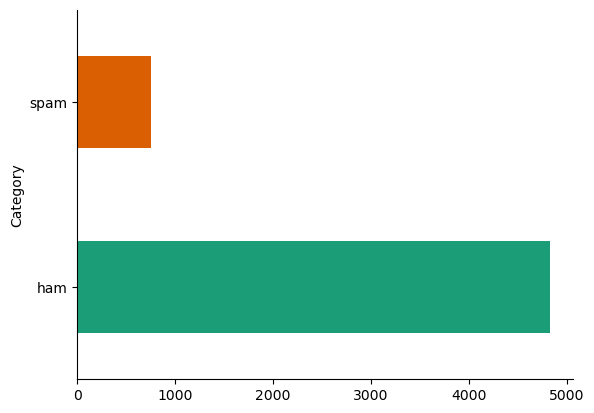

In [9]:
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

deleting  column category because of using a new column nameed spam and due to that we don't need it anymore 

In [10]:
data.drop('Category', inplace = True,axis=1)

In [11]:
data

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [12]:
data.tail()

,Message,spam
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0
5571,Rofl. Its true to its name,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  5572 non-null   object
 1   spam     5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [14]:
data.isna().sum()

Message    0
spam       0
dtype: int64

# Train ,Test Data Preparation

## Cross-validation

Defining the number of splits, shuffle option, and random state for KFold

In [15]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

Extracting features (X) and target variable (y) from the dataset

In [16]:
X = data['Message']
y = data['spam']

Iterating over each fold of the KFold cross-validation

In [17]:
for train_index, test_index in k_fold.split(X):
    # Splitting the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Feartures
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Target variable
    

Vectorizing the text data using CountVectorizer

In [18]:
data = CountVectorizer()

X_train_cv = data.fit_transform(X_train.values)
X_train_cv

<4458x7773 sparse matrix of type '<class 'numpy.int64'>'
	with 59240 stored elements in Compressed Sparse Row format>

In [19]:
X_train_cv.shape

(4458, 7773)

In [20]:
data.get_feature_names_out()[1770]

'cheese'

In [21]:
data.vocabulary_

{'go': 3170,
 'until': 7215,
 'jurong': 3881,
 'point': 5302,
 'crazy': 2065,
 'available': 1152,
 'only': 4967,
 'in': 3656,
 'bugis': 1558,
 'great': 3248,
 'world': 7626,
 'la': 3995,
 'buffet': 1556,
 'cine': 1817,
 'there': 6867,
 'got': 3210,
 'amore': 940,
 'wat': 7426,
 'ok': 4936,
 'lar': 4023,
 'joking': 3854,
 'wif': 7542,
 'oni': 4963,
 'free': 2994,
 'entry': 2622,
 'wkly': 7587,
 'comp': 1922,
 'to': 6965,
 'win': 7552,
 'fa': 2746,
 'cup': 2120,
 'final': 2862,
 'tkts': 6954,
 '21st': 358,
 'may': 4410,
 '2005': 350,
 'text': 6822,
 '87121': 686,
 'receive': 5650,
 'question': 5551,
 'std': 6491,
 'txt': 7126,
 'rate': 5599,
 'apply': 1018,
 '08452810075over18': 68,
 'even': 2666,
 'my': 4682,
 'brother': 1531,
 'is': 3758,
 'not': 4846,
 'like': 4118,
 'speak': 6387,
 'with': 7576,
 'me': 4418,
 'they': 6874,
 'treat': 7063,
 'aids': 869,
 'patent': 5131,
 'as': 1079,
 'per': 5165,
 'your': 7737,
 'request': 5752,
 'melle': 4447,
 'oru': 5018,
 'minnaminunginte': 4507,


## Model Training

Training the Naive Bayes model using multinomialNB 

In [22]:
model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [23]:
X_test_cv = data.transform(X_test)

## Model Evaluation and ploting results

In [24]:
y_pred = model.predict(X_test_cv)

training_report=classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.96      0.92      0.94       154

    accuracy                           0.98      1114
   macro avg       0.97      0.95      0.96      1114
weighted avg       0.98      0.98      0.98      1114



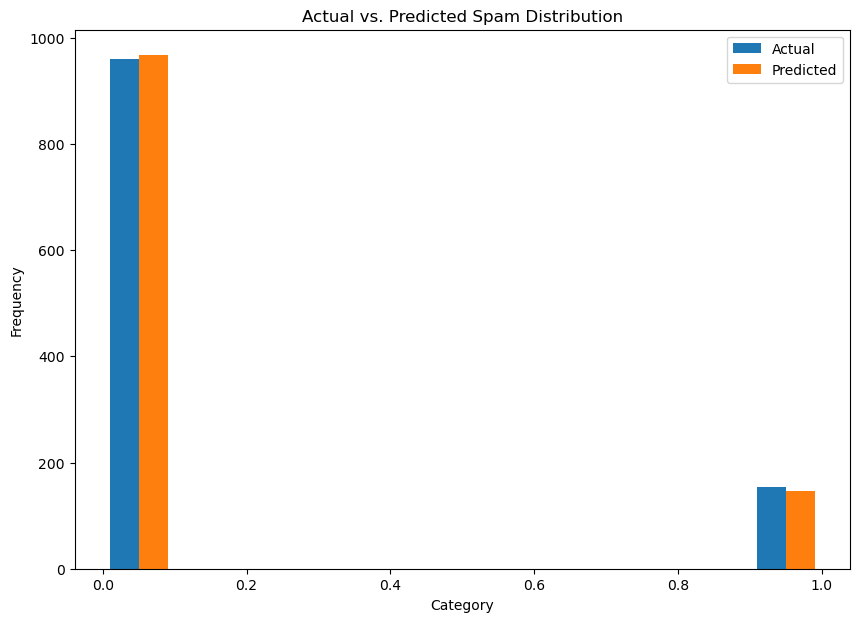

In [25]:
plt.figure(figsize=(10, 7))
plt.hist([y_test, y_pred], label=['Actual', 'Predicted'])
plt.legend(loc='upper right')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Spam Distribution')
plt.show()

In [26]:
def cf_matrix(eval,pred):
  conf_matrix = confusion_matrix(eval,pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  #(y_test, y_pred)
#print("Confusion Matrix:")
#print(conf_matrix)

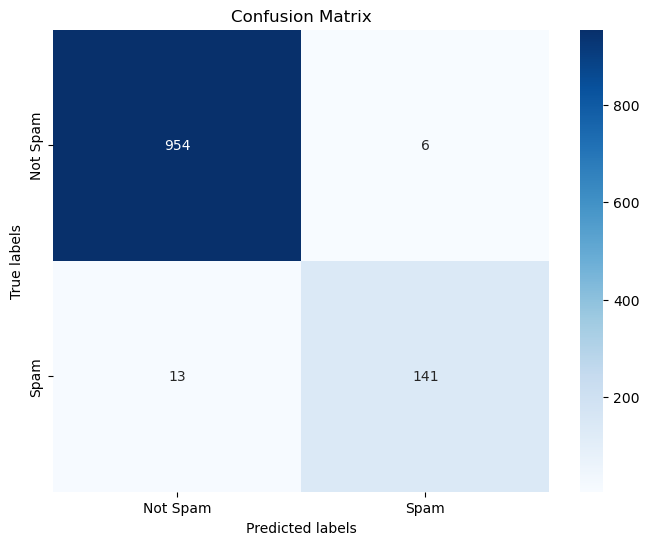

In [27]:
cf_matrix(y_test,y_pred)

#Evaluation of model perfomance

## Using Telegram messages data set

In [28]:
#read the  csv file
telegram_text_df = pd.read_csv("data/dataset.csv")

#view the dataset
telegram_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  20348 non-null  object
 1   text       20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB


In [29]:
#Since there are no null values continue and evaluate the model on this data

#create df copy for processing
telegram_text_df2 = telegram_text_df.copy()

telegram_text_df2


,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [30]:
# Encode spam column
telegram_text_df2['spam'] = telegram_text_df2["text_type"].apply(lambda x: 1 if x == 'spam' else 0)

# Assign X and y values
X_df2 = telegram_text_df2["text"]
y_df2 = telegram_text_df2["spam"]

# Vectorize

X_df2_train = data.transform(X_df2.values)

# Assuming 'model' is a pre-trained model
# Prediction
y_df2_pred = model.predict(X_df2_train)

# Print classification report
telegram_messages_report = classification_report(y_df2, y_df2_pred)

print(telegram_messages_report)



              precision    recall  f1-score   support

           0       0.78      0.92      0.84     14337
           1       0.67      0.38      0.48      6011

    accuracy                           0.76     20348
   macro avg       0.72      0.65      0.66     20348
weighted avg       0.75      0.76      0.74     20348



## Using Enron messages data set

In [31]:
##Extract data set
enron_df=pd.read_csv("data/enron_spam_data.csv")

#drop null values
enron_df.dropna(inplace=True)

enron_df

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [32]:
#Since no values we can prep the datafram for evaluation
#create copy to work with
enron_df2=enron_df.copy()

#drop unecessary columns
enron_df2.drop("Message ID" , axis=1 , inplace=True)
enron_df2.drop("Subject" , axis=1 , inplace=True)
enron_df2.drop("Date" , axis=1 , inplace=True)
enron_df2

# Encode spam column
enron_df2['spam'] = enron_df2["Spam/Ham"].apply(lambda x: 1 if x == 'spam' else 0)

# Assign X and y values
X_enron_df2 = enron_df2["Message"]
y_enron_df2 = enron_df2["spam"]

# Vectorize

X_enron_df2_train = data.transform(X_enron_df2.values)

# Assuming 'model' is a pre-trained model
# Prediction
y_enron_df2_pred = model.predict(X_enron_df2_train)

# Print classification report
enron_mail_report = classification_report(y_enron_df2, y_enron_df2_pred)

print(enron_mail_report)

              precision    recall  f1-score   support

           0       0.51      0.76      0.61     16493
           1       0.54      0.27      0.36     16614

    accuracy                           0.52     33107
   macro avg       0.52      0.52      0.49     33107
weighted avg       0.52      0.52      0.49     33107



# Evaluation of model performance results on different datasets

## Training report

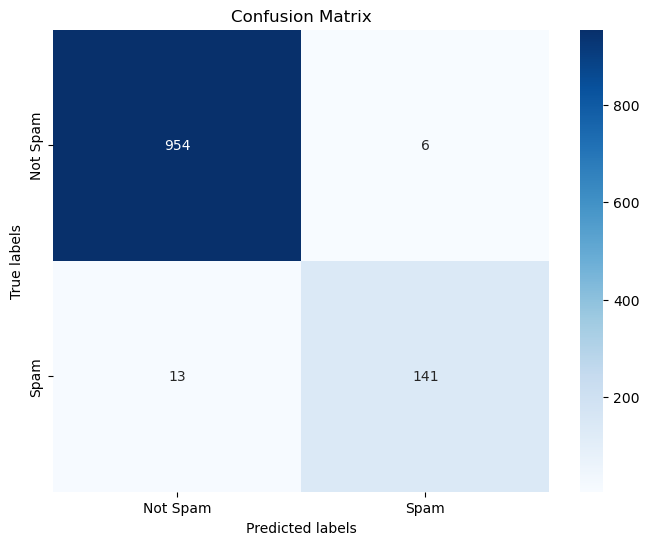

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       960
           1       0.96      0.92      0.94       154

    accuracy                           0.98      1114
   macro avg       0.97      0.95      0.96      1114
weighted avg       0.98      0.98      0.98      1114



In [33]:
cf_matrix(y_test, y_pred)
print(training_report)

**Comments**

The Naive Bayes spam classifier shows strong performance with an overall accuracy of 98%. It performs exceptionally well on non-spam messages (precision, recall, and F1-score all at 0.99). For spam messages, the classifier achieves good precision (0.96) and recall (0.92), resulting in an F1-score of 0.94. The macro average metrics are slightly lower, indicating room for improvement in spam detection, but overall the model is highly effective in distinguishing between spam and non-spam messages.

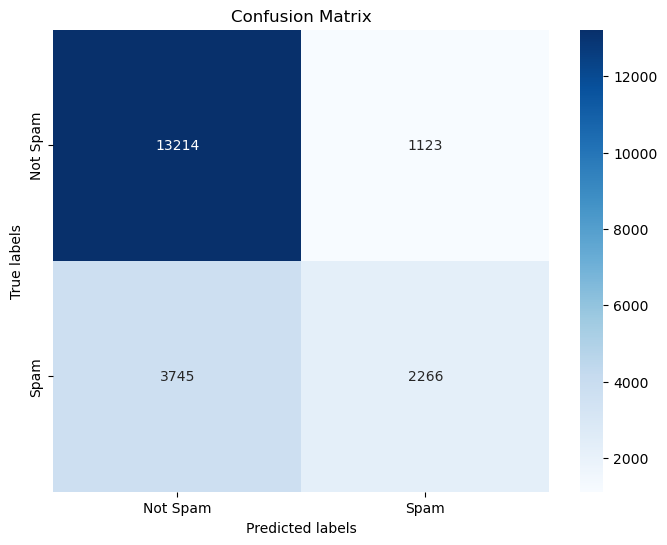

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     14337
           1       0.67      0.38      0.48      6011

    accuracy                           0.76     20348
   macro avg       0.72      0.65      0.66     20348
weighted avg       0.75      0.76      0.74     20348



In [34]:
cf_matrix(y_df2, y_df2_pred)
print(telegram_messages_report)

**Comment**

When applying the model to the Telegram messages dataset, it demonstrates strong capabilities in identifying non-spam messages with a precision of 0.78 and a recall of 0.92, resulting in an F1-score of 0.84. However, its performance in detecting spam messages is notably weaker, with a precision of 0.67, recall of 0.38, and an F1-score of 0.48. This indicates a higher rate of false negatives, potentially allowing some spam messages to evade detection.

*Comparing to the training report:*

---



  **The model's performance on non-spam messages is consistent with its training report, showing high precision, recall, and F1-score.**
  **However, its performance on spam messages is lower compared to the training report, indicating a discrepancy between training and application contexts.**
  **While the overall accuracy remains relatively high at 76%, improvements are needed, particularly in spam detection, to enhance the model's effectiveness for the Telegram messages dataset.**

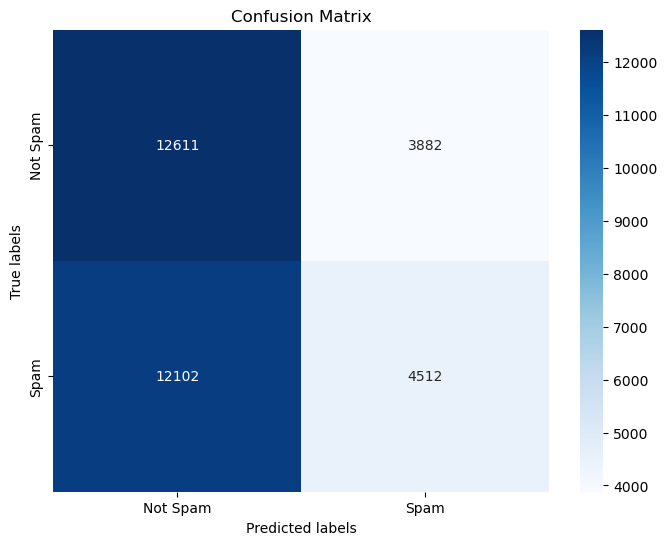

              precision    recall  f1-score   support

           0       0.51      0.76      0.61     16493
           1       0.54      0.27      0.36     16614

    accuracy                           0.52     33107
   macro avg       0.52      0.52      0.49     33107
weighted avg       0.52      0.52      0.49     33107



In [35]:
cf_matrix(y_enron_df2,y_enron_df2_pred)
print(enron_mail_report)

##Comment

The model's performance on this dataset shows a decrease in overall effectiveness compared to previous iterations:

  While it maintains a modest precision for both non-spam and spam classes (0.51 and 0.54, respectively), the recall rates are notably different. Non-spam recall is higher at 0.76, while spam recall is lower at 0.27.
  Consequently, the F1-scores for both classes are lower, indicating a weaker balance between precision and recall.
  The overall accuracy also drops to 52%, suggesting that the model's ability to correctly classify instances from both classes has decreased.

In summary, this iteration of the model exhibits diminished performance across key metrics, indicating the need for further optimization or potentially reconsidering its suitability for this dataset.

# Visualizing the Models Performance Statistics

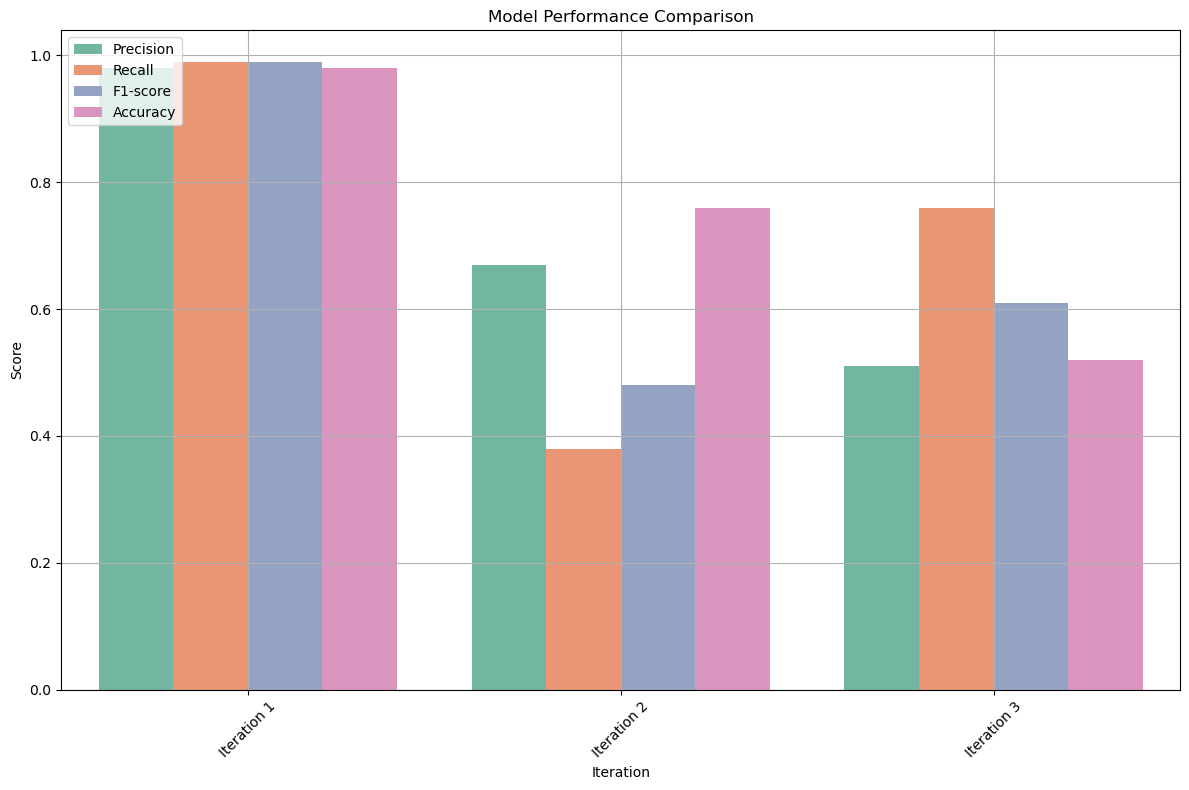

In [36]:
# Data
data = {
    'Iteration': ['Iteration 1', 'Iteration 2', 'Iteration 3'],
    'Precision': [0.98, 0.67, 0.51],  # Precision values from summary comments
    'Recall': [0.99, 0.38, 0.76],  # Recall values from summary comments
    'F1-score': [0.99, 0.48, 0.61],  # F1-score values from summary comments
    'Accuracy': [0.98, 0.76, 0.52],  # Accuracy values from summary comments
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))

# Bar plots
sns.barplot(data=df.melt(id_vars='Iteration', var_name='Metric', value_name='Score'),
            x='Iteration', y='Score', hue='Metric', palette='Set2')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.grid(True)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Final Conclusion

The model's performance across various datasets reveals fluctuations in its effectiveness, with some iterations demonstrating strong capabilities while others exhibit notable shortcomings.

    Strengths and Weaknesses:
        The model consistently demonstrates strong performance in identifying non-spam messages, achieving high precision, recall, and F1-scores in most cases.
        However, its performance in detecting spam messages fluctuates, with some iterations showing satisfactory results while others exhibit significant shortcomings, particularly in recall and F1-score.

    Impact on Overall Accuracy:
        The overall accuracy of the model varies across datasets, reflecting its ability to correctly classify instances from both classes.

    Causes of Performance Issues:
        Fluctuations in performance could stem from variations in dataset characteristics, such as the distribution of spam and non-spam messages, the presence of diverse language patterns, or the emergence of new spam tactics not adequately captured during model training.
        Limitations of the Naive Bayes algorithm, such as its assumption of feature independence and sensitivity to imbalanced datasets, could also contribute to performance issues, particularly in scenarios where spam messages exhibit complex linguistic patterns or are heavily outnumbered by non-spam messages.

Insights and Recommendations for Improvement:

    Data Preprocessing and Feature Engineering:
        Conduct thorough data preprocessing to handle noise, imbalance, and outliers.
        Explore advanced feature engineering techniques to capture more nuanced linguistic patterns and improve the model's ability to distinguish between spam and non-spam messages.

    Algorithm Selection and Model Complexity:
        Consider alternative algorithms or ensemble methods that can better capture the underlying complexity of the dataset, potentially moving beyond the constraints of Naive Bayes.
        Experiment with more sophisticated models, such as deep learning architectures, to leverage the vast amount of data available in the Telegram messages dataset and capture intricate patterns that may elude simpler algorithms.

    Regular Model Retraining and Fine-Tuning:
        Implement a systematic process for regular model retraining and fine-tuning to adapt to evolving spam tactics and changes in data distributions.
        Incorporate feedback mechanisms or active learning strategies to continuously improve the model's performance over time.

    Evaluation and Benchmarking:
        Establish robust evaluation metrics and benchmarks to systematically assess model performance across various datasets and ensure consistent quality standards.
        Conduct comprehensive comparative analyses to identify best practices and areas for improvement, drawing insights from both successful and suboptimal model iterations.

In summary, while the model demonstrates strengths in certain contexts, its performance issues underscore the complexity of spam detection tasks and the need for continuous innovation and refinement. By addressing data quality, algorithmic limitations, and model adaptation strategies, significant improvements can be achieved in enhancing the model's effectiveness across diverse datasets and real-world applications.